# Numerical Simulation Laboratory

# Numerical exercise 6 

## Exercise 06.1

nblock = 20
nstep = 10 000

In [1]:
import math
import numpy as np
#risultati analitici
T = np.linspace(0.5, 2.0, 100)
beta = 1/T
b = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
h=0.02 #external field

#energia
e = -J*( th + ch*thN )/( 1 + thN )
#capacità termica
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)/Ns
#susciettività
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#magnetizzazione
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

### <font color=blue> Energia interna </font>

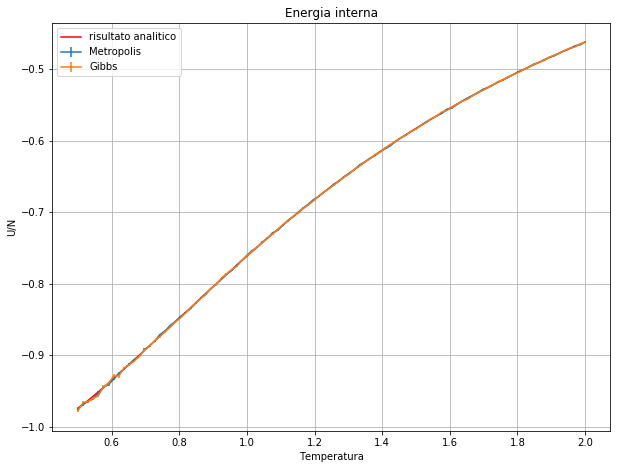

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, U, Uerr = np.loadtxt('Files/Ene_metro.out', delimiter='  ', unpack=True) #metropolis
temp, UG, UGerr = np.loadtxt('Files/Ene_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, e, color='red', label='risultato analitico')
plt.errorbar(temp, U, yerr=Uerr, label='Metropolis')  #metropolis
plt.errorbar(temp, UG, yerr=UGerr, label='Gibbs') #Gibbs

plt.title('Energia interna')
plt.xlabel('Temperatura')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Capacità termica </font>

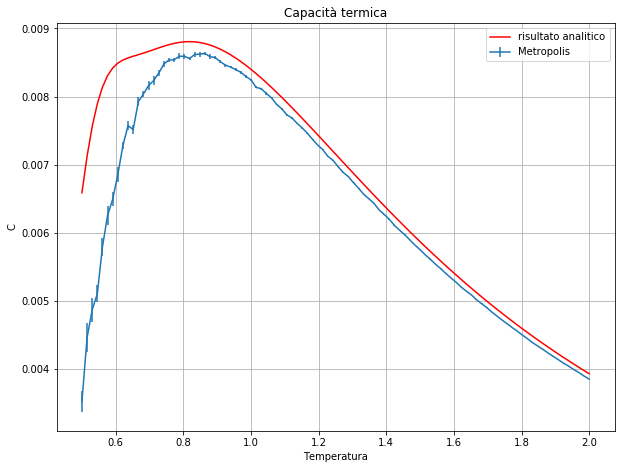

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, C, Cerr = np.loadtxt('Files/Heat_metro.out', delimiter='  ', unpack=True) #metropolis
#temp, CG, CGerr = np.loadtxt('Files/Heat_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, heat, color='red', label='risultato analitico')
plt.errorbar(temp, C, yerr=Cerr, label='Metropolis') #metropolis
#plt.errorbar(temp, CG, yerr=CGerr, label='Gibbs')  #Gibbs

plt.title('Capacità termica')
plt.xlabel('Temperatura')
plt.ylabel('C')
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Susciettività Magnetica </font>

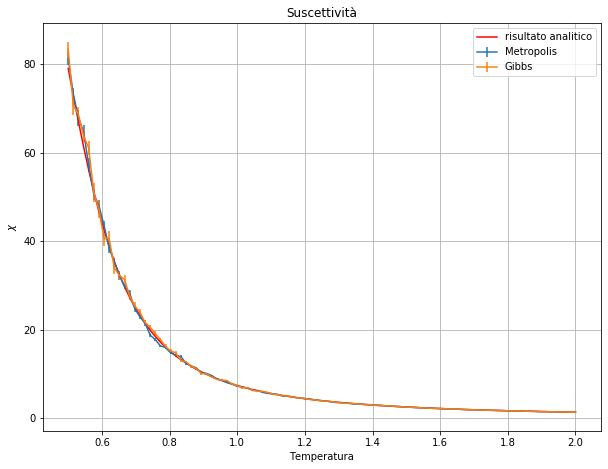

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, chi, chierr = np.loadtxt('Files/Chi_metro.out', delimiter='  ', unpack=True) #metropolis
temp, chiG, chiGerr = np.loadtxt('Files/Chi_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, X, color='red', label='risultato analitico')
plt.errorbar(temp, chi, yerr=chierr, label='Metropolis') #metropolis
plt.errorbar(temp, chiG, yerr=chiGerr, label='Gibbs') #Gibbs

plt.title('Suscettività')
plt.xlabel('Temperatura')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Magnetizzazione</font>

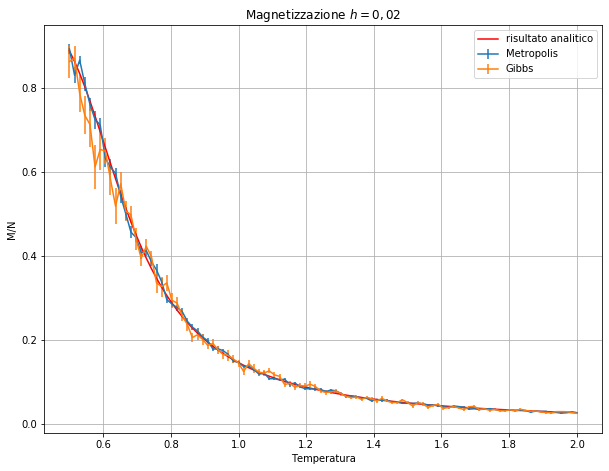

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, mag, magerr = np.loadtxt('Files/Mag_metro.out', delimiter='  ', unpack=True) #metropolis
temp, magG, magGerr = np.loadtxt('Files/Mag_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, M, color='red', label='risultato analitico')
plt.errorbar(temp, mag, yerr=magerr, label='Metropolis') #metropolis
plt.errorbar(temp, magG, yerr=magGerr, label='Gibbs') #Gibbs

plt.title('Magnetizzazione $h=0,02$')
plt.xlabel('Temperatura')
plt.ylabel('M/N')
plt.legend()
plt.grid(True)

plt.show()